# 1. Install Dependencies and Setup

In [1]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


Requested tensorflow-gpu from https://files.pythonhosted.org/packages/8a/45/fa31ced1db38f9424f262dfbf35747fe5378b5c808cecb373c8cb8e515d3/tensorflow-gpu-2.12.0.tar.gz has invalid metadata: Expected end or semicolon (after name and no valid version specifier)
    python_version>"3.7"
                  ^
Please use pip<24.1 if you need to use this version.
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu


In [2]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.1.0
anyio                        4.6.2.post1
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        24.2.0
babel                        2.16.0
beautifulsoup4               4.12.3
bleach                       6.2.0
blinker                      1.8.2
certifi                      2024.8.30
cffi                         1.17.1
charset-normalizer           3.4.0
click                        8.1.7
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.7
decorator                    5.1.1
defusedxml                   0.7.1
entrypoints                  0.4
executing                    

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

C:\Users\eakes\AppData\Local\Temp\ipykernel_3668\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir ="Users\eakes\Documents\Applicative Project\flask_crop_classifier\data\maize"

In [8]:
import os

y_path = r"C:\Users\eakes\Documents\Applicative Project\flask_crop_classifier\data\maize"
print(os.listdir(y_path))


['006196e1c.png', '0086c28b2.png', '00a18f05e.png', '0150b5b7e.png', '01642cae8.png', '0184ec53f.png', '030e7f9ef.png', '0419f5bbc.png', '051ea51d0.png', '06e1ee6e1.png', '084d21b80.png', '0bdaf1d8f.png', '0cd0d9b8c.png', '0f16cf10a.png', '107bd7230.png', '11323514a.png', '115808876.png', '11dc03905.png', '12025fcc1.png', '16511dd22.png', '16e38d4af.png', '1898398b8.png', '18a235096.png', '18b6755a1.png', '194d34152.png', '19f880311.png', '1b1ab91eb.png', '1d21b25f9.png', '1d8e6686f.png', '20200610_063725_jpg.rf.182e6c7d1402094ed9018efe5cf66aa8.jpg', '20200610_063725_jpg.rf.5ab07584e56f6f013a78634b7afe1f11.jpg', '20200610_063725_jpg.rf.cfc6265c967d943eca7f375ae00bd87a.jpg', '20200610_064018_jpg.rf.2518ffc16cd4d4fc0affc48e41c7adc4.jpg', '20200610_064018_jpg.rf.47440433e3a8752edcf258eb5954bdc9.jpg', '20200610_064018_jpg.rf.6519336756e8507dc8075b39c278e9df.jpg', '20200610_064221_jpg.rf.6e014b5fd912af636c917f57b0321500.jpg', '20200610_064221_jpg.rf.9be581e38c8527ab8aa63acc01235cb9.jpg', '2

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
import os
import cv2
import imghdr

# Define your data directory and acceptable image formats
data_dir = r"C:\Users\eakes\Documents\Applicative Project\flask_crop_classifier\data\maize"
image_exts = ['jpeg', 'jpg', 'png', 'gif', 'bmp']  # Add any other formats you want to include

# Loop through each class subdirectory
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    
    if os.path.isdir(class_dir):  # Ensure it's a directory
        for image in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image)
            try:
                img = cv2.imread(image_path)  # Try to read the image
                tip = imghdr.what(image_path)  # Get the image type
                
                if tip not in image_exts:
                    print(f'Image not in ext list: {image_path}')
                    os.remove(image_path)  # Remove the image if not valid
            except Exception as e:
                print(f'Issue with image {image_path}: {e}')  # Print the exception message
                # Optionally, you can uncomment the next line to remove the problematic image
                # os.remove(image_path)


# 3. Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\eakes\Documents\Applicative Project\flask_crop_classifier\data")

Found 4100 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

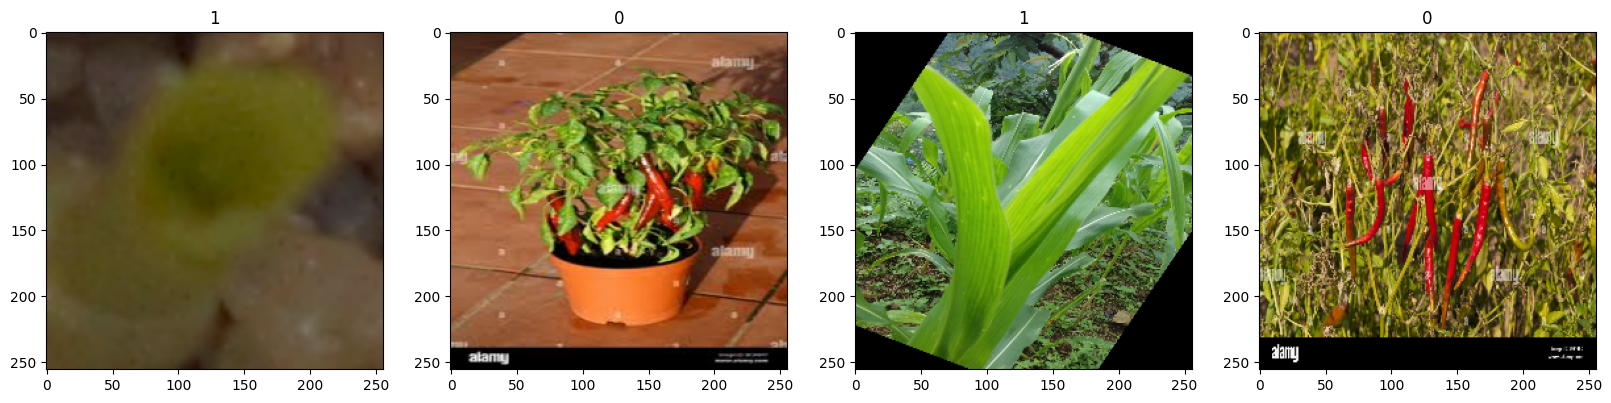

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[3.37479830e-01, 2.84776092e-01, 2.73011386e-01],
          [3.49667013e-01, 3.04405302e-01, 3.00008863e-01],
          [3.63087416e-01, 3.25595051e-01, 3.31281245e-01],
          ...,
          [2.73109913e-01, 2.17774317e-01, 2.16009736e-01],
          [2.85852045e-01, 2.37393588e-01, 2.28052050e-01],
          [2.79929787e-01, 2.40714088e-01, 2.27017343e-01]],
 
         [[3.37328672e-01, 2.79528648e-01, 2.67215312e-01],
          [3.49694461e-01, 3.04281563e-01, 2.93765306e-01],
          [3.58920723e-01, 3.27020854e-01, 3.26545984e-01],
          ...,
          [2.84340829e-01, 2.38512784e-01, 2.40904853e-01],
          [2.85599649e-01, 2.46383980e-01, 2.44959354e-01],
          [2.45936558e-01, 2.13463068e-01, 2.04670176e-01]],
 
         [[3.40689212e-01, 2.84362614e-01, 2.71308213e-01],
          [3.67324769e-01, 3.22516590e-01, 3.07076603e-01],
          [3.53658825e-01, 3.17438513e-01, 3.13516945e-01],
          ...,
          [2.50814885e-01, 2.06904039e-01, 2.1397

# 5. Split Data

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

90

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Add layers
model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Adjust based on your output needs


c:\Users\eakes\Documents\Applicative Project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     7,872,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,877,729 (30.05 MB)

 Trainable params: 7,877,729 (30.05 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 23s 230ms/step - accuracy: 0.8477 - loss: 0.6236 - val_accuracy: 0.9588 - val_loss: 0.0896
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 21s 237ms/step - accuracy: 0.9591 - loss: 0.1018 - val_accuracy: 0.9525 - val_loss: 0.0998
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 215ms/step - accuracy: 0.9714 - loss: 0.0758 - val_accuracy: 0.9737 - val_loss: 0.0615
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - accuracy: 0.9932 - loss: 0.0321 - val_accuracy: 0.9825 - val_loss: 0.0425
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - accuracy: 0.9987 - loss: 0.0105 - val_accuracy: 0.9875 - val_loss: 0.0417
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 212ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 0.9675 - val_loss: 0.1051
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 213ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.9850 - val_loss: 0.0477
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accu

# 8. Plot Performance

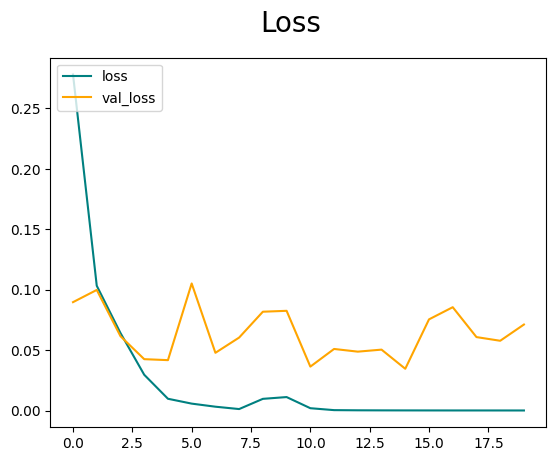

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

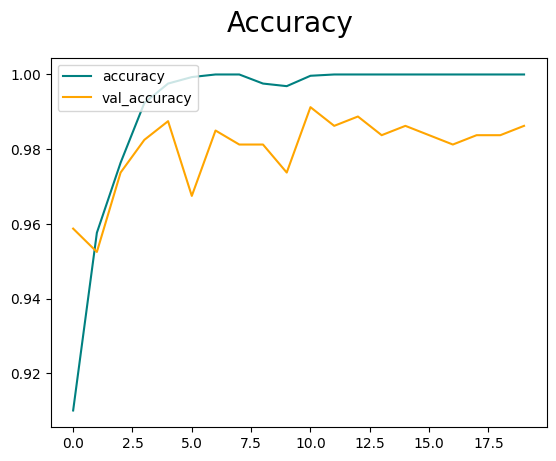

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [35]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.98207885, shape=(), dtype=float32) tf.Tensor(0.98916966, shape=(), dtype=float32) tf.Tensor(0.9791667, shape=(), dtype=float32)


# 10. Test

In [36]:
import cv2

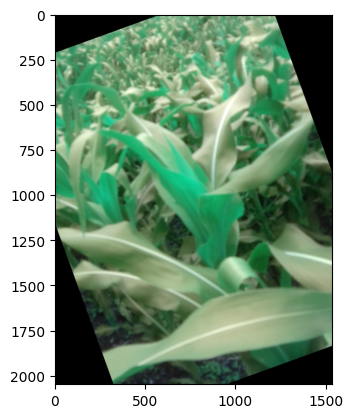

In [37]:
import cv2
import matplotlib.pyplot as plt

# Load the image
# Ensure the correct path to the image is provided
img = cv2.imread(r"C:\Users\eakes\Documents\Applicative Project\flask_crop_classifier\data\maize\20200612_104246_jpg.rf.f8aaf88d286d20c00dd3a6cb4ebf0993.jpg")
if img is not None:
    plt.imshow(img)
    plt.show()
else:
    print("Error: Image not found or cannot be opened.")

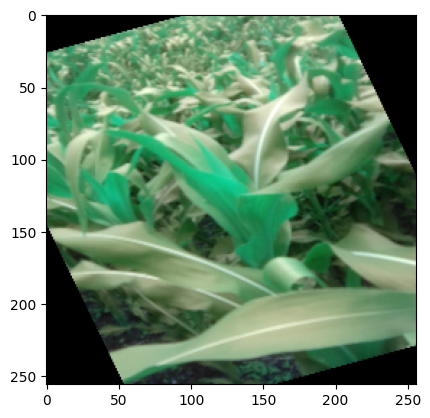

In [38]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

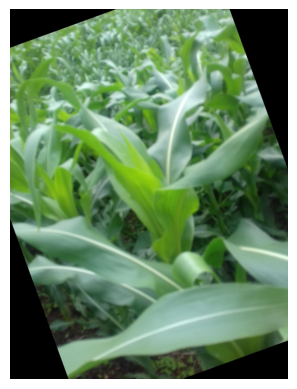

In [39]:
import cv2
import matplotlib.pyplot as plt

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Optional: Turn off axis
plt.show()


In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [41]:
yhat

array([[1.]], dtype=float32)

In [42]:
if yhat > 0.5: 
    print(f'Predicted class is maize')
else:
    print(f'Predicted class is chilli')

Predicted class is maize


# 11. Save the Model

In [43]:
from tensorflow.keras.models import load_model

In [44]:
import os

if not os.path.exists('models'):
    os.makedirs('models')


In [45]:
model.save(os.path.join('models','imageclassifier.keras'))

In [46]:
new_model = load_model(os.path.join('models','imageclassifier.keras'))

In [47]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [48]:
model.export(os.path.join('models', 'imageclassifier_tf'))


INFO:tensorflow:Assets written to: models\imageclassifier_tf\assets


INFO:tensorflow:Assets written to: models\imageclassifier_tf\assets


Saved artifact at 'models\imageclassifier_tf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1884619443280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1884619445584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1884619445776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1884619446544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1884619447312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1884619449040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1884619448656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1884619449808: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [49]:
if yhat > 0.5: 
    print(f'Predicted class is maize')
else:
    print(f'Predicted class is chilli')

Predicted class is maize


In [50]:
from tensorflow.keras.models import load_model
import numpy as np
import os

# Ensure the directory exists
if not os.path.exists('models'):
    os.makedirs('models')

# Save the model in the models directory
model.save(os.path.join('models', 'imageclassifier.keras'))

# Load the model
new_model = load_model(os.path.join('models', 'imageclassifier.keras'))

# Predict with a sample image (replace 'resize' with the processed image array)
# Assuming 'resize' is an image array
yhatnew = new_model.predict(np.expand_dims(resize / 255.0, axis=0))

# Interpretation of the prediction
if yhatnew > 0.5:
    print('Predicted class is maize')
else:
    print('Predicted class is chilli')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted class is maize


In [51]:
import zipfile
import os

# Path to your saved model
model_path = 'models/imageclassifier.h5'
zip_path = 'models/imageclassifier.zip'

# Zip the model file
with zipfile.ZipFile(zip_path, 'w') as zipf:
    zipf.write(model_path, os.path.basename(model_path))

print(f"Model zipped at {zip_path}")


Model zipped at models/imageclassifier.zip
